<a href="https://colab.research.google.com/github/YuXuan20040221/CNN-Assignment-2025/blob/main/CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# CNN Classroom Exercise: Image Classification with CIFAR-10
# Objective: Practice building, training, and evaluating a CNN using TensorFlow/Keras
# Environment: Google Colab with GPU
# Dataset: CIFAR-10 (10 classes of 32x32 color images)

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Step 2: Load and Preprocess CIFAR-10 Dataset
# CIFAR-10 contains 60,000 32x32 color images in 10 classes (e.g., airplane, cat, dog)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

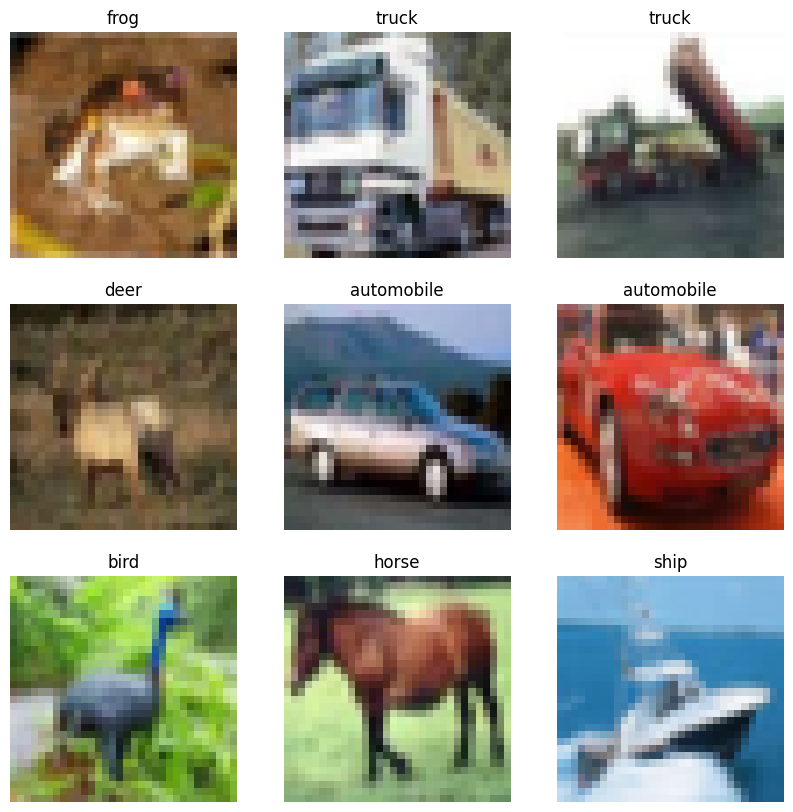

In [11]:
# Step 3: Visualize Sample Data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [65]:
# Step 4: Build the CNN Model
from tensorflow.keras import models, layers

model = models.Sequential([
    # Conv Layer 1
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3)),
    layers.BatchNormalization(),
    layers.LeakyReLU(negative_slope=0.1),
    layers.MaxPooling2D((2, 2)),

    # Conv Layer 2
    layers.Conv2D(64, (2, 2)),
    layers.BatchNormalization(),
    layers.LeakyReLU(negative_slope=0.1),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    # Conv Layer 3
    layers.Conv2D(128, (2, 2)),
    layers.BatchNormalization(),
    layers.LeakyReLU(negative_slope=0.1),
    layers.Dropout(0.2),

    layers.Conv2D(256, (2, 2)),
    layers.BatchNormalization(),
    layers.LeakyReLU(negative_slope=0.1),
    layers.Dropout(0.4),

    # Flatten & Dense
    layers.Flatten(),
    layers.Dense(64),
    layers.LeakyReLU(negative_slope=0.1),
    layers.Dropout(0.5),

    # Output
    layers.Dense(10, activation='softmax')
])

# Display model summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_33 (LeakyReLU)      │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 14, 14, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_34 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_35 (LeakyReLU)      │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 5, 5, 256)      │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_36 (LeakyReLU)      │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_37 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 585,610 (2.23 MB)

 Trainable params: 584,650 (2.23 MB)

 Non-trainable params: 960 (3.75 KB)

In [52]:
# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
# Step 6: Train the Model
history = model.fit(train_images, train_labels, epochs=18,
                    validation_data=(test_images, test_labels))


Epoch 1/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8601 - loss: 0.4101 - val_accuracy: 0.8006 - val_loss: 0.6489
Epoch 2/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8654 - loss: 0.3947 - val_accuracy: 0.7923 - val_loss: 0.6686
Epoch 3/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8631 - loss: 0.3993 - val_accuracy: 0.7993 - val_loss: 0.6375
Epoch 4/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8691 - loss: 0.3768 - val_accuracy: 0.8124 - val_loss: 0.6132
Epoch 5/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8672 - loss: 0.3835 - val_accuracy: 0.8170 - val_loss: 0.6139
Epoch 6/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8657 - loss: 0.3890 - val_accuracy: 0.8114 - val_loss: 0.6093
Epoch 7/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8651 - loss: 0.3879 - val_accuracy: 0.8201 - val_loss: 0.5765
Epoch 8/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8692 - loss: 0.3763

In [63]:
# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 - 1s - 2ms/step - accuracy: 0.8132 - loss: 0.5983

Test accuracy: 0.8132


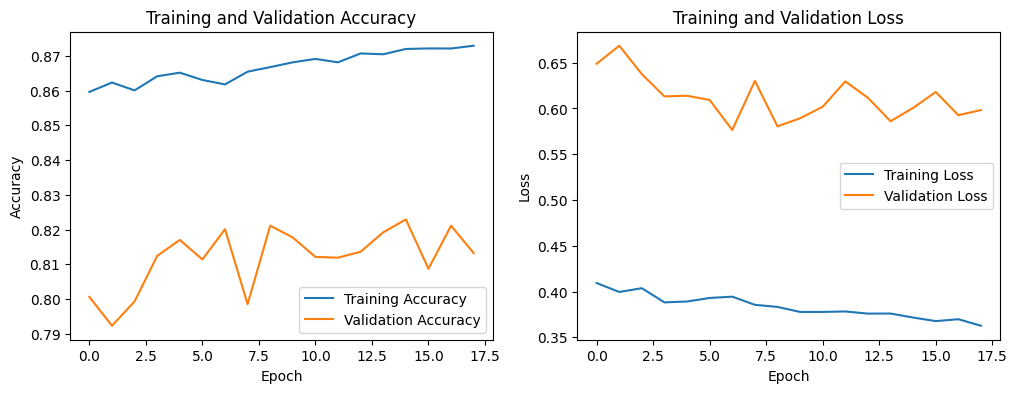

In [64]:

# Step 8: Plot Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [35]:
# Step 9: Make Predictions
predictions = model.predict(test_images[:5])
for i in range(5):
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    print(f"Image {i+1}: Predicted: {predicted_label}, True: {true_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Image 1: Predicted: cat, True: cat
Image 2: Predicted: automobile, True: ship
Image 3: Predicted: ship, True: ship
Image 4: Predicted: airplane, True: airplane
Image 5: Predicted: frog, True: frog


In [36]:
# Step 10: Save Model Performance for Autograding
# This cell saves the model performance to a text file for GitHub Actions
try:
    # Get final training accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Create performance summary
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    # Save to file for GitHub Actions
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.7657
Test Loss: 1.6003
Final Training Accuracy: 0.9808
Final Validation Accuracy: 0.7657
Final Training Loss: 0.0601
Final Validation Loss: 1.6003
Training Epochs: 10
Model Parameters: 585130
